Прошу прощения, сделал до дедлайна, но забыл залить на гит

### Problem 1
Implement serial test and apply to a `samples`

Хи-квадрат статистика: 89.6
p-значение: 0.7397711424411568


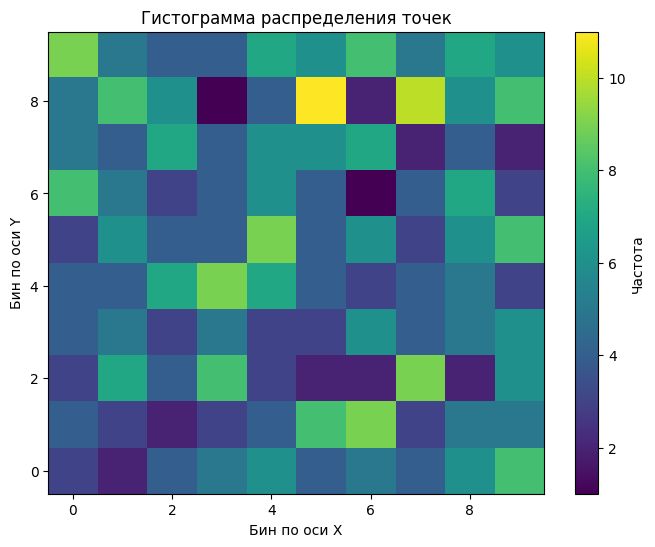

In [50]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def generate_random_sequence(size, low=0, high=1):
    return np.random.uniform(low, high, size)

def split_into_k_tuples(sequence, k):
    return np.array([sequence[i:i + k] for i in range(0, len(sequence) - k + 1, k)])

def chi_square_test(points, bins=10):
    
   
    hist, edges = np.histogramdd(points, bins=bins)

    expected = np.full(hist.shape, np.mean(hist))
    
    chi2_stat, p_value = stats.chisquare(hist.ravel(), expected.ravel())
    
    return chi2_stat, p_value, hist

def plot_histogram(hist):
    plt.figure(figsize=(8, 6))
    plt.imshow(hist.T, cmap='viridis', origin='lower', aspect='auto')
    plt.colorbar(label='Частота')
    plt.title('Гистограмма распределения точек')
    plt.xlabel('Бин по оси X')
    plt.ylabel('Бин по оси Y')
    plt.show()

#пример
np.random.seed(33)  
sequence = generate_random_sequence(1000) 
k = 2 
points = split_into_k_tuples(sequence, k) 

chi2_stat, p_value, hist = chi_square_test(points, bins=10)

print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_value}")

plot_histogram(hist)


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [116]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

In [126]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
random_good = [rng() for _ in range(30000)]

import plotly.express as px

fig = px.scatter_3d(x=random[::3], y=random[1::3], z=random[2::3], opacity=0.1)
fig.update_traces(marker_size = 2)




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'opacity': 0.1, 'size': 2, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AAAAADAAAD8AAABAFABrPwAAAIsI78' ... 'AQ9vPXPwAAwN45PO0/AACA/LSw3z8='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAACQAKD8AAAAwD1CJPwAAQGgGFu' ... 'AYMfbuPwAAQJxtk+E/AACA9Z4O1D8='),
                    'dtype': 'f8'},
              'z': {'bdata': ('AAAAABsASz8AAABkC8imPwAAwDhTqu' ... 'CUpvbbPwAAAKZGtLI/AACA4Fwh2z8='),
                    'dtype': 'f8'}}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'x'}},
                         'yaxis': {'title': {'text': 'y'}},
                         'zaxis': {'title': {'text': 'z'}}},
               'template': '...'}
})

In [125]:
fig = px.scatter_3d(x=random_good[::3], y=random_good[1::3], z=random_good[2::3], opacity=0.1)
fig.update_traces(marker_size = 2)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'opacity': 0.1, 'size': 2, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AADArF4E4T8AAEA/JLDZPwAAAAC2a4' ... 'CyowKqPwAAAJPYANI/AAAANu9oqT8='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AADAKfAi1D8AAEA+IJvpPwAAIP9Hoe' ... 'DnidXVPwAAAFTKsJA/AAAAzpWK0D8='),
                    'dtype': 'f8'},
              'z': {'bdata': ('AAAAVYYX0j8AAMAQcIrSPwAAAJ+lOM' ... 'A/mfrIPwAAANWPPMk/AAAgYkz95z8='),
                    'dtype': 'f8'}}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'x'}},
                         'yaxis': {'title': {'text': 'y'}},
                         'zaxis': {'title': {'text': 'z'}}},
               'template': '...'}
})

у rng_bad плохие параметры, поэтому точки выстраиваются вдоль плоскостей, а у rng точки распределены равномерно по кубу

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

2.009


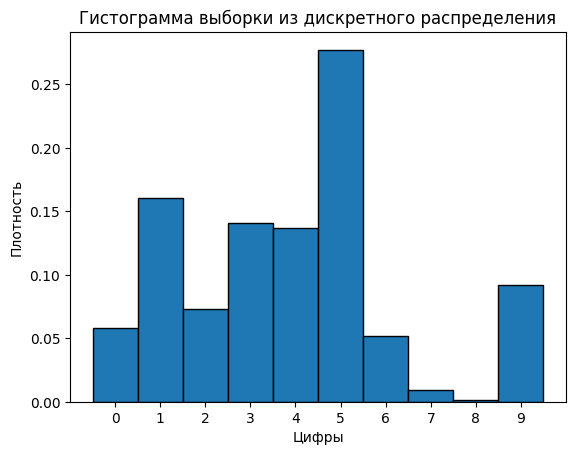

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Веса для чисел от 0 до 9
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
print(sum(weights))
digits = np.arange(10)  # Числа от 0 до 9

# Нормализуем веса (чтобы сумма была равна 1)
weights = np.array(weights)
weights /= weights.sum()

# Оптимизация: упорядочим веса и создадим кумулятивную вероятность (CDF)
cumulative_weights = np.cumsum(weights)



# Сгенерируем случайные числа в диапазоне от 0 до 1
random_samples = np.random.rand(1000)

# Определим, какое число соответствует каждому случайному числу
sampled_digits = []
for sample in random_samples:
    # Находим первое число, для которого кумулятивная вероятность больше случайного числа
    digit = np.searchsorted(cumulative_weights, sample)
    sampled_digits.append(digit)

# Преобразуем список в массив для удобства работы
sampled_digits = np.array(sampled_digits)

# Строим гистограмму
plt.hist(sampled_digits, bins=np.arange(11)-0.5, edgecolor='black', density=True)
plt.title('Гистограмма выборки из дискретного распределения')
plt.xlabel('Цифры')
plt.ylabel('Плотность')
plt.xticks(digits)
plt.show()


### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

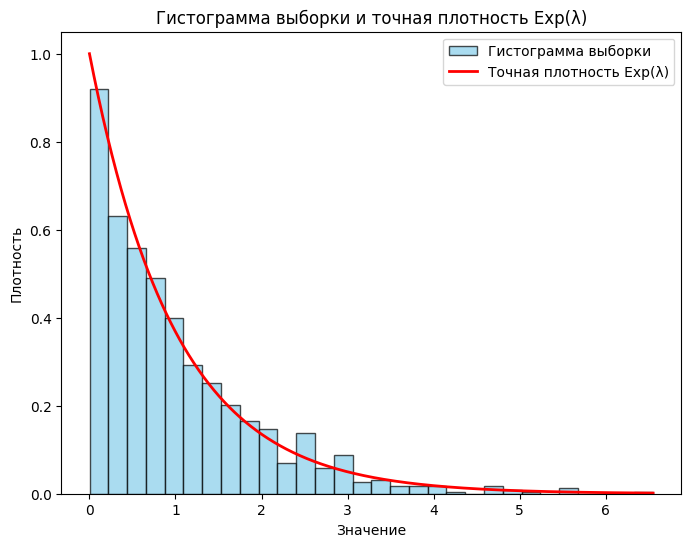

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Параметр распределения
lambda_param = 1.0

# Размер выборки
n_samples = 1000

# Генерация случайных чисел, равномерно распределенных на [0, 1]
uniform_samples = np.random.rand(n_samples)

# Применение метода обратного преобразования
exp_samples = -np.log(uniform_samples) / lambda_param

# Строим гистограмму и точную плотность на одном графике
plt.figure(figsize=(8, 6))

# Гистограмма для выборки из экспоненциального распределения
plt.hist(exp_samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Гистограмма выборки')

# Точная плотность экспоненциального распределения
x = np.linspace(0, np.max(exp_samples), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)

# График точной плотности
plt.plot(x, pdf, color='red', lw=2, label='Точная плотность Exp(λ)')

# Добавляем подписи и легенду
plt.title('Гистограмма выборки и точная плотность Exp(λ)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

plt.show()


### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

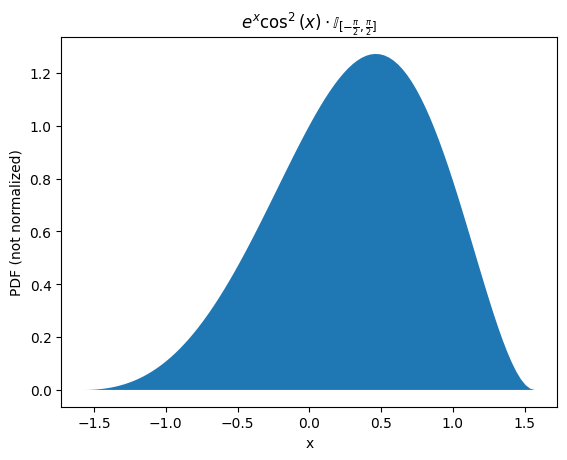

In [ ]:
import numpy as np
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

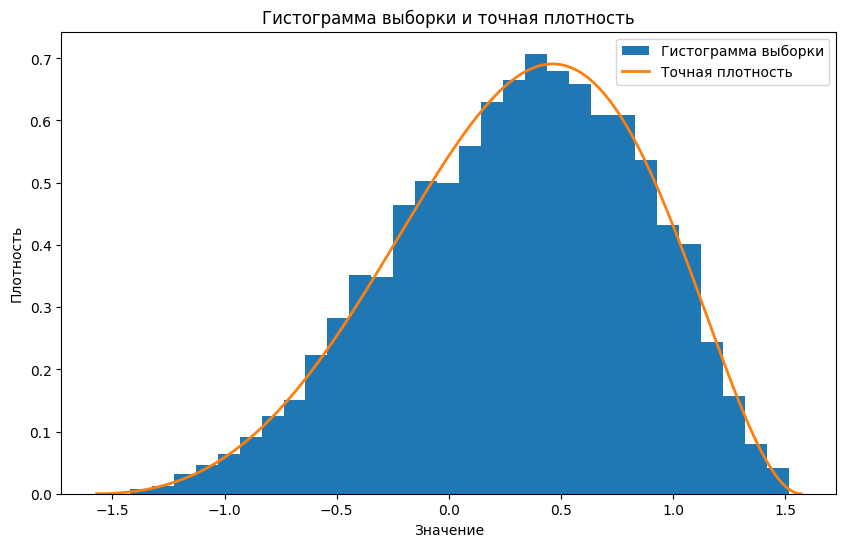

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#Определение плотности e^x * cos^2(x)

def f(x):
    return np.exp(x) * np.cos(x)**2
const, error = quad(f, -np.pi / 2, np.pi / 2)
def f_norm(x):
    return f(x)/const

#Генерация точек с использованием метода принятия-отклонения
def func(n):
    #Максимальная плотность для целевого распределения
    max = 1.3/const  #максимальное значение плотности на [ -π/2, π/2 ]
    
    #Генерация равномерных точек на интервале [-π/2, π/2]
    x = np.random.uniform(-np.pi / 2, np.pi / 2, n)
    
    #Генерация случайных чисел для принятия-отклонения
    y = np.random.uniform(0, max, n)
    
    #Принятие точек, которые лежат под графиком плотности
    m = x[y <= f_norm(x)]
    
    #Если слишком мало точек принято, повторяем процесс
    while len(m) < n:
        remaining_samples = n - len(m)
        x = np.random.uniform(-np.pi / 2, np.pi / 2, remaining_samples)
        y = np.random.uniform(0, max, remaining_samples)
        m = np.concatenate([m, x[y <= f_norm(x)]])
    
    return m[:n]

#Смоделировать 1000 точек
n = 10000
samples = func(n)

#вывод графика
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, label='Гистограмма выборки')

x_values = np.linspace(-np.pi / 2, np.pi / 2, 1000)
plt.plot(x_values, f_norm(x_values),  lw=2, label='Точная плотность')
plt.title('Гистограмма выборки и точная плотность')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

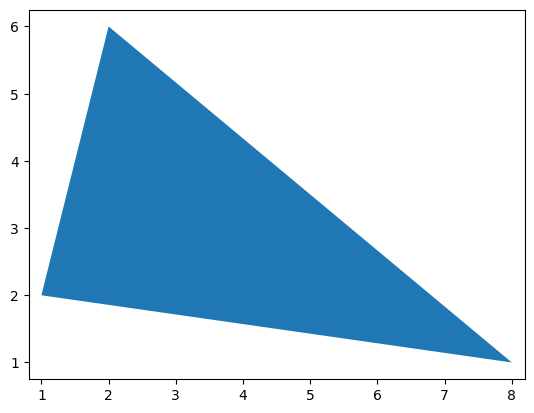

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

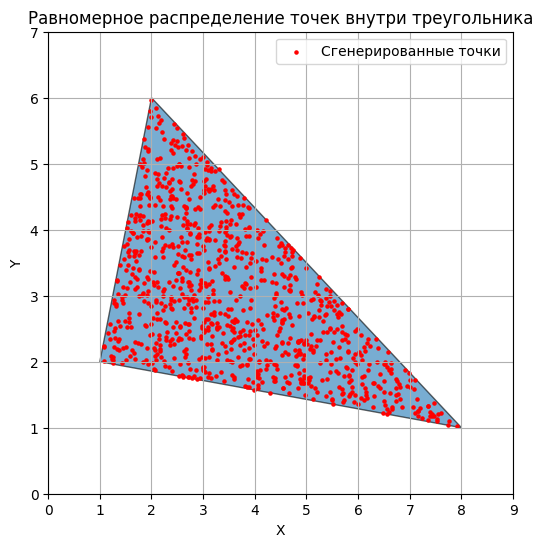

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

#Вершины треугольника
A = np.array([1, 2])
B = np.array([2, 6])
C = np.array([8, 1])


N = 1000
u = np.random.rand(N)
v = np.random.rand(N)

#Барицентрические координаты :(
s = np.sqrt(u)
x = (1 - s) * A[0] + s * (1 - v) * B[0] + s * v * C[0]
y = (1 - s) * A[1] + s * (1 - v) * B[1] + s * v * C[1]

#вывод
fig, ax = plt.subplots(figsize=(6, 6))
polygon = Polygon([A, B, C], closed=True, edgecolor='black',  alpha=0.6)
ax.add_patch(polygon)
ax.scatter(x, y, color = 'red', s=5, label="Сгенерированные точки")

ax.set_xlim(min(A[0], B[0], C[0]) - 1, max(A[0], B[0], C[0]) + 1)
ax.set_ylim(min(A[1], B[1], C[1]) - 1, max(A[1], B[1], C[1]) + 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Равномерное распределение точек внутри треугольника")
ax.legend()
plt.grid()
plt.show()

барицентрические координаты, по сути, задают точку внутри треугольника через отношение площадей треугольников(которые при разбиении получаются) к самому треугольнику

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

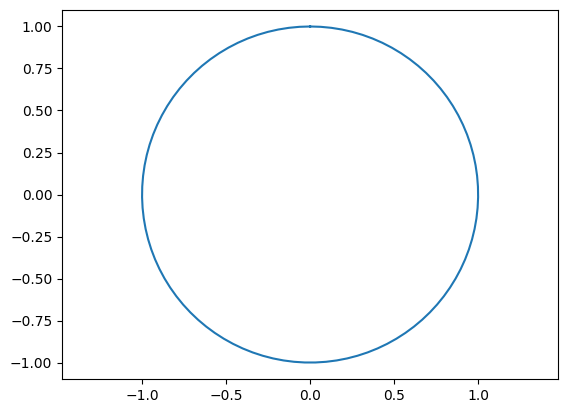

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

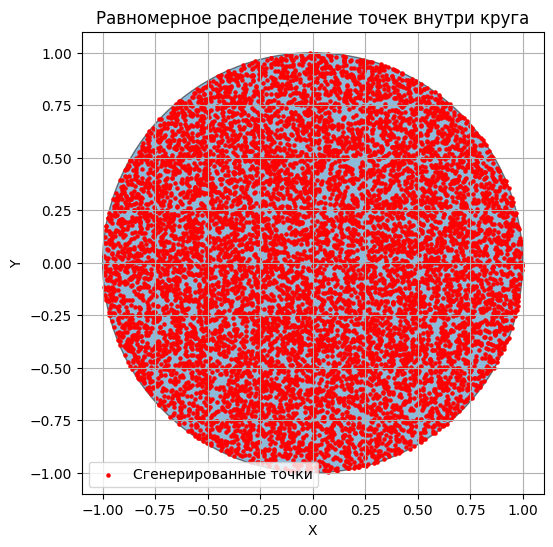

In [45]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
#координаты
theta = np.random.uniform(0, 2 * np.pi, n)
r = np.sqrt(np.random.uniform(0, 1, n))  # sqrt обеспечивает равномерность по площади

x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, alpha=0.5, edgecolor='black')
ax.add_patch(circle)
ax.scatter(x, y, color='red', s=5, label="Сгенерированные точки")

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Равномерное распределение точек внутри круга")
ax.legend()
ax.set_aspect('equal')  #ось X и Y в одинаковом масштабе
plt.grid()
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

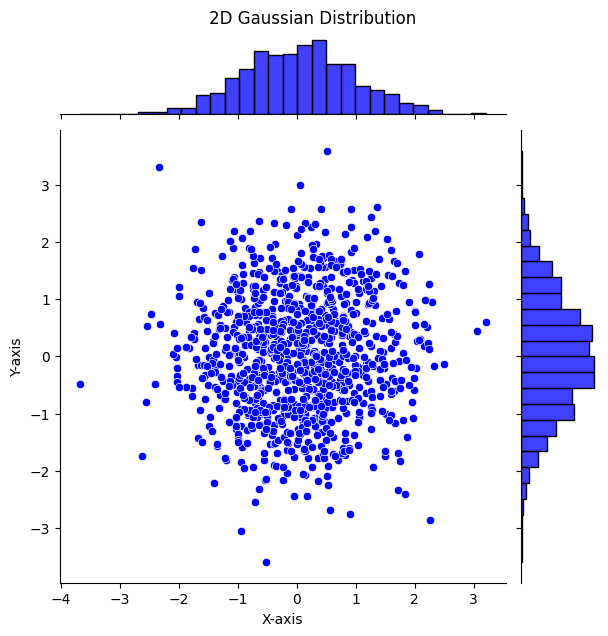

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

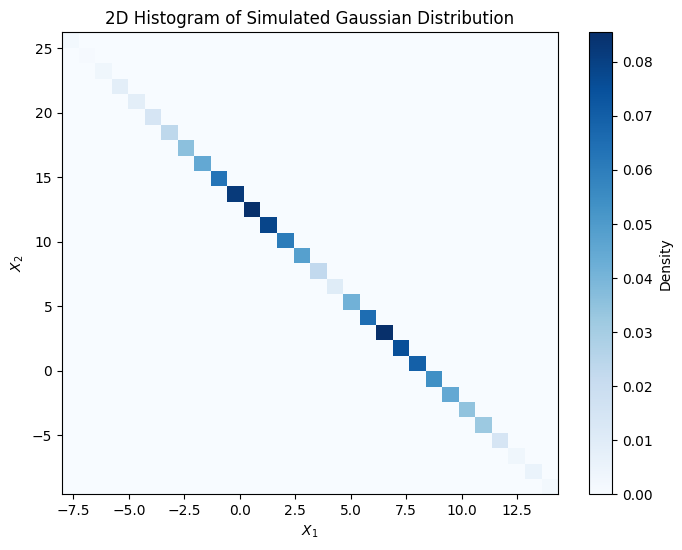

Sample mean:
[3.74643107 7.4057103 ]
Sample covariance matrix:
[[ 19.73353997 -31.57366396]
 [-31.57366396  50.51786233]]


In [48]:
import numpy as np
import matplotlib.pyplot as plt

#без тригонометрических функций из википедии
def box_muller_modified(n):
    U1 = np.random.rand(n)
    U2 = np.random.rand(n)
    R = np.sqrt(-2 * np.log(U1))
    Z0 = R * (2 * U2 - 1) / np.sqrt((2 * U2 - 1)**2 + (1 - 2 * U2)**2)
    Z1 = R * (1 - 2 * U2) / np.sqrt((2 * U2 - 1)**2 + (1 - 2 * U2)**2)
    return Z0, Z1

n = 1000
mu = np.array([4, 7])
Sigma = np.array([[20, -4], [-4, 40]])

# Разложение ковариационной матрицы через Cholesky
L = np.linalg.cholesky(Sigma)

# Генерация стандартных нормальных значений
Z0, Z1 = box_muller_modified(n // 2)
Z2, Z3 = box_muller_modified(n // 2)
Z = np.vstack((np.hstack((Z0, Z2)), np.hstack((Z1, Z3)))).T

X = Z @ L.T + mu 

#вывод картинки
plt.figure(figsize=(8, 6))
plt.hist2d(X[:, 0], X[:, 1], bins=30, density=True, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('2D Histogram of Simulated Gaussian Distribution')
plt.show()

# Сравнение статистик
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X.T)

print(f"Sample mean:\n{sample_mean}")
print(f"Sample covariance matrix:\n{sample_cov}")
